In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## Methodologie ML

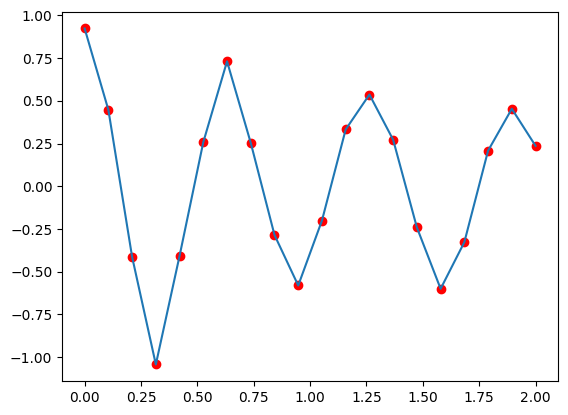

In [ ]:
def inconue(x):
    return np.cos(10. * x)* np.exp(-x/2)



nb_points = 20
xl, xr = 0,2
esp = 0.1

XS = np.linspace(xl, xr, nb_points)
YS = inconue(XS) + esp * np.random.randn(nb_points)

plt.plot(XS, YS)
plt.scatter(XS, YS, color='red')

## ML 

La problématique est la suivante conaissant les points rouges, on veut reconstruire la courbe bleu

### Regression linéaire

On cherche la courbe bleu parmis les fonctions 

$$
x \mapsto a x + b
$$
celle qui "colle" le mieux au nuage de points rouges. 
pour ça on a besoin d'une fonctione d'erreur.

$$
J(A,b)= \sum_{i=1}^N(y_i - (ax_i + b))^2
$$
On cherche $(a,b)$ minimisant $J$.

A ce stade, l'erreur quadratique parait arbitraire, on pourrait imaginer minimiser.

$$
J_2(A,b)= \sum_{i=1}^N(y_i - (ax_i + b))
$$

**Exercice**

1. Coder la fonction $J_2$ en python
2. Utiliser minimize pour trouver (a,b)

In [18]:
def J2(ps):
    a, b = ps
    return np.sum((YS - a * XS + b)**2)


In [19]:
resultat = minimize(J2, [0, 0])

In [20]:
a,b = resultat.x

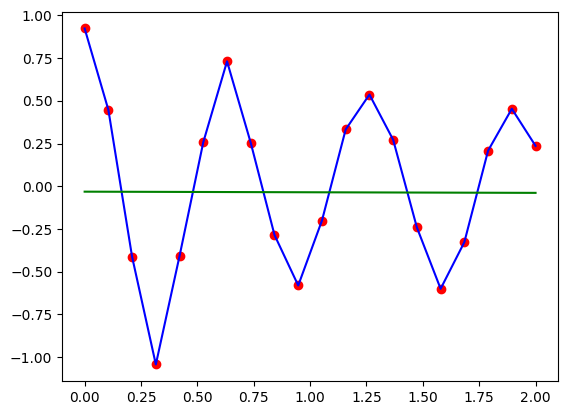

In [21]:
plt.plot(XS, YS, color = 'blue', label="fonction caché")
plt.scatter(XS, YS, color='red', label="points observés")
plt.plot(XS, a*XS + b, color='green', label="meilleur approx linéaire")

**Conclusion** on voit que le modèle n'est pas satisfaisant. Mais surtout on voit meme a partir des points que le modele n'est pas satisfaisant il reste loin de l'échantillon.

Fondamentalement le modèle n'est pas assez complexe pour reproduire l'échantillon, on voit que le minimum de $J_2$ est resté à 4,6.


## Nouveau Modèle

On vat chercher le prédicteur parmi les polynomes de degré inferieur a un certain entier $D$

$$
x\mapsto \sum_{k=0}^d a_k x^k
$$
Les ($a_0, ...., a_d$) sont les parametres qu'on obtiendra automatiquement par minimisation de l'erreur. 

In [22]:
d = 5
def erreur (ps):
    residus = np.zeros_like(XS)
    puissances = np.ones_like(XS)
    for p in ps:
        residus += p * puissances
        puissances *= XS
    return np.sum((residus-YS)**2)

In [ ]:
resultat = minimize(erreur, np.zeros(d+1))
resultat

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.461452176789222
        x: [ 8.054e-01 -7.054e+00  1.447e+01 -1.062e+01  2.557e+00]
      nit: 17
      jac: [-1.520e-06 -3.874e-07  2.086e-07 -3.576e-07  4.768e-07]
 hess_inv: [[ 3.173e-01 -1.954e+00 ... -2.191e+00  4.813e-01]
            [-1.954e+00  1.880e+01 ...  2.744e+01 -6.392e+00]
            ...
            [-2.191e+00  2.744e+01 ...  4.933e+01 -1.214e+01]
            [ 4.813e-01 -6.392e+00 ... -1.214e+01  3.041e+00]]
     nfev: 114
     njev: 19

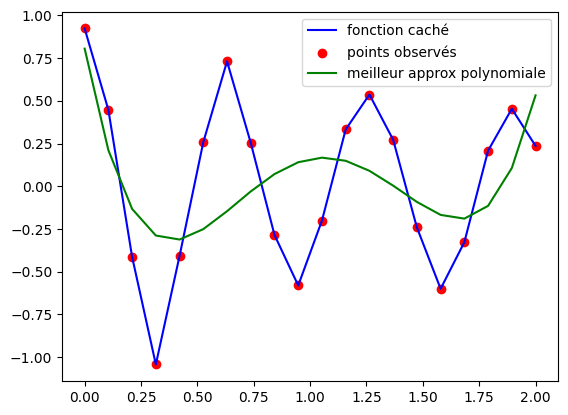

In [24]:
ps = resultat.x    
residus = np.zeros_like(XS)
puissances = np.ones_like(XS)
for p in ps:
    residus += p * puissances
    puissances *= XS

plt.plot(XS, YS, color = 'blue', label="fonction caché")
plt.scatter(XS, YS, color='red', label="points observés")   
plt.plot(XS, residus, color='green', label="meilleur approx polynomiale")
plt.legend()

**Conclusion** on voit que le modèle est bien plus satisfaisant.


## Refactor du code


In [ ]:
class Polynome: 
    def __init__(self, degre : int, coefficients :  list[float] |None = None):
        self.coefficients = coefficients

    def degres(self):
        return len(self.coefficients) - 1
    
    def __call__(self, xs):
        residus = np.zeros_like(xs)
        puissances = np.ones_like(xs)
        for p in self.coefficients:
            residus += p * puissances
            puissances *= xs
        return residus


In [ ]:
identite = Polynome(1, [0, 1])

## Exercice 
On pourrait implémenter la base de bernstein sur [a,b] qui aux coefficients ($c_O, ... c_d$) associe 
$$
\sum{k=0}^d (d k)((x -a) / (b - a))^k((b - x)/(b - a))^(d-k)
$$

In [ ]:
from scipy.special import binom

In [ ]:
class bernstein : 
    def _init_(self, a, b, coefficients):
        self.a = a
        self.b = b
        self.coefficients = coefficients
    
    def __call__(self, xs):
        y = (xs - a) / (b - a)
        somme = 0
        for (k,c) in enumerate(coefficients):
            somme = somme + c * y ** k * (1 - y) ** (d- k)
        return somme

**Exercice** 

1. Visualiser la base de Bernstein pour des petites valeurs. 
2. Faire l'entrainement dans cette base